**Install Required Libraries**


In [ ]:
!pip install textblob wordcloud googletrans==4.0.0-rc1
!python -m textblob.download_corpora
!pip install emoji



[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 7.2 MB/s eta 0:00:00


**Importing Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud
from googletrans import Translator
from google.colab import files
import emoji


**Sentiment Function with Emojis, Confidence, Translation**

In [ ]:
translator = Translator()

def analyze_sentiment(text):
    try:
        translated = translator.translate(str(text), dest='en')
        blob = TextBlob(translated.text)
        polarity = blob.sentiment.polarity

        # Determine sentiment
        if polarity > 0:
            sentiment = "Positive 😀"
        elif polarity < 0:
            sentiment = "Negative 😡"
        else:
            sentiment = "Neutral 😐"

        return sentiment, round(polarity, 2), translated.text
    except Exception as e:
        return "Error", 0.0, text


**Real-Time Sentiment Check**

In [ ]:
text_input = input("Enter a sentence (any language): ")
sentiment, confidence, translated = analyze_sentiment(text_input)
print(f"\nOriginal: {text_input}")
print(f"Translated: {translated}")
print(f"Sentiment: {sentiment}")
print(f"Confidence Score: {confidence}")


Enter a sentence (any language): i am not happy with you

Original: i am not happy with you
Translated: i am not happy with you
Sentiment: Negative 😡
Confidence Score: -0.4


creating csv file with sentences

In [ ]:
import pandas as pd

data = {
    "Text": [
        "I love this product!",
        "Terrible service, I am very disappointed.",
        "It’s okay, nothing special.",
        "Excelente experiencia, muy recomendado.",
        "J'adore ce produit, il est fantastique!",
        "Das war eine schreckliche Erfahrung.",
        "Could be better, but not bad.",
        "Absolutely amazing! Will buy again.",
        "No me gustó para nada.",
        "Service was slow, but the food was good.",
        "I’m not sure how I feel about this.",
        "Worst app I've ever used.",
        "Muy bueno, me encantó.",
        "C'était correct, sans plus.",
        "Great value for the price.",
        "Nie polecam tego produktu.",
        "Fast delivery and friendly staff.",
        "Demasiado caro para lo que es.",
        "I will recommend this to my friends!",
        "Not worth the money."
    ]
}

df = pd.DataFrame(data)
df.to_csv("sentiment_input.csv", index=False)
print("CSV file 'sentiment_input.csv' created!")


CSV file 'sentiment_input.csv' created!


**Upload & Analyze CSV**

In [ ]:
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv("sentiment_input.csv")

# Apply sentiment analysis
df[['Sentiment', 'Confidence', 'Translated_Text']] = df['Text'].apply(lambda x: pd.Series(analyze_sentiment(x)))

df.head()


Saving sentiment_analysis.csv to sentiment_analysis.csv


,Text,Sentiment,Confidence,Translated_Text
0,I love this product!,Positive 😀,0.62,I love this product!
1,"Terrible service, I am very disappointed.",Negative 😡,-0.99,"Terrible service, I am very disappointed."
2,"It’s okay, nothing special.",Positive 😀,0.43,"It’s okay, nothing special."
3,"Excelente experiencia, muy recomendado.",Positive 😀,0.58,"Excellent experience, highly recommended."
4,"J'adore ce produit, il est fantastique!",Positive 😀,0.50,"I love this product, it is fantastic!"


**Visualizations (Bar, Pie, Word Cloud)**

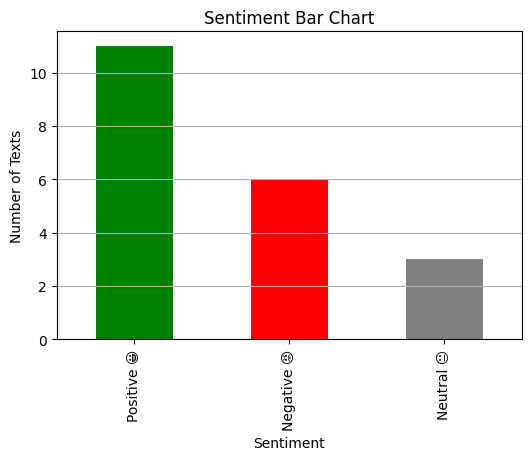

In [ ]:
plt.figure(figsize=(6,4))
df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title("Sentiment Bar Chart")
plt.ylabel("Number of Texts")
plt.grid(axis='y')
plt.show()


**Pie Chart**

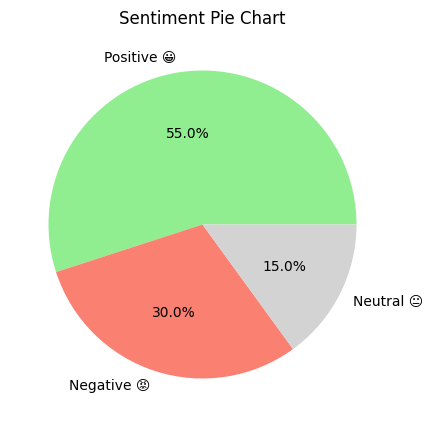

In [ ]:
plt.figure(figsize=(5,5))
df['Sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon', 'lightgray'])
plt.title("Sentiment Pie Chart")
plt.ylabel("")
plt.show()


**Word Cloud per Sentiment**


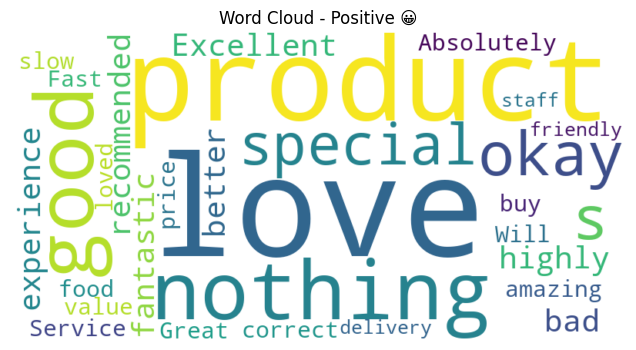

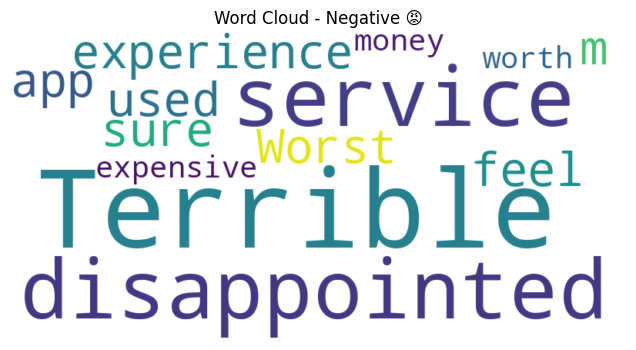

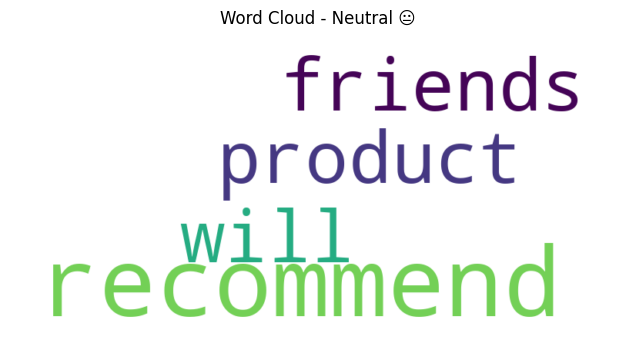

In [ ]:
for label in ['Positive 😀', 'Negative 😡', 'Neutral 😐']:
    text = " ".join(df[df['Sentiment'] == label]['Translated_Text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {label}")
    plt.show()


**Export Final CSV with Sentiments**


In [ ]:
df.to_csv("Sentiment_Analysis_Results.csv", index=False)
files.download("Sentiment_Analysis_Results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>